In [10]:
import pandas as pd
import os
import sys
import importlib

import matplotlib.pyplot as plt
import country_converter as coco

In [11]:
# !{sys.executable} -m pip install country_converter

In [12]:
user_module_path = './'
module_path = os.path.abspath(os.path.join(user_module_path))

import fetch_data

In [13]:
def reload_module(module,
                 user_module_path = './'):
    # Block to handle reloading user modules
    module_path = os.path.abspath(os.path.join(user_module_path))
    if module_path not in sys.path:
        sys.path.append(module_path)
    importlib.reload(module)
    fetch_data.test_refresh()

### Testing Data

Testing data from [Our World in Data](https://ourworldindata.org/coronavirus-testing)

In [14]:
# def fetch_owid(save_file=True,
#                filename = 'owid_covid.csv',
#                threshold=1,
#                data_path='assets/'):
#     if fetch_data.check_file_age(filename, threshold):
#         return pd.read_csv(f'{data_path}{filename}')
#     owid_covid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    
#     owid_columns_sel = ['iso_code', 'date', 'tests_units', 'population',
#                   'population_density', 'median_age',
#                   'aged_65_older', 'aged_70_older',
#                   'gdp_per_capita', 'extreme_poverty',
#                   'cvd_death_rate', 'diabetes_prevalence',
#                   'female_smokers', 'male_smokers',
#                   'handwashing_facilities', 'hospital_beds_per_thousand']
#     owid_covid_df.columns = [ f"owid_{x}" for x in owid_covid_df.columns ]
#     owid_columns_sel = [ f"owid_{x}" for x in owid_columns_sel ]

#     owid_covid_df = owid_covid_df[owid_columns_sel]
#     owid_covid_df['owid_date'] = pd.to_datetime(owid_covid_df['owid_date'])
#     if save_file:
#         owid_covid_df.to_csv(f"{data_path}{filename}", index=False)
    

In [15]:
# def merge_owid(full_df):
#     owid_covid_df = fetch_owid()
    
#     non_covid_cols = ['Country/Region', 'Province/State', 'ISO3166:2', 'ISO3166:3',
#            'ISO3166:#', 'Name', 'Population', 'GDP (Total)',
#            'Life Expectancy (Male)', 'Life Expectancy (Female)', 'Date']

#     last_date = full_df['Date'].unique()[-1]

#     noncovid_sdf = full_df.loc[full_df['Date'] == last_date][non_covid_cols]

#     owid_dates = set(owid_covid_df['owid_date'].unique())
#     jh_dates = set(full_df['Date'].unique())

#     owid_only = sorted(list(owid_dates - jh_dates))
#     common_dates = sorted(list(owid_dates.intersection(jh_dates)))

#     mz_df_columns = list(full_df.columns) + list(owid_covid_df.columns)

#     owid_covid_df.loc[owid_covid_df['owid_iso_code'] == 'OWID_WRL', 'owid_iso_code'] = 'WLD'

#     megazord_df = pd.DataFrame(columns=mz_df_columns)

#     for date in owid_only:
#         owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
#         temp_sdf = noncovid_sdf.merge(owid_sdf, how='left', left_on='ISO3166:3',
#                                  right_on='owid_iso_code')
#         temp_sdf['Date'] = temp_sdf['owid_date'] 
#         megazord_df = pd.concat([megazord_df, temp_sdf])

#     for date in common_dates:
#         owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
#         full_sdf = full_df.loc[full_df['Date'] == date]
#         full_sdf = full_sdf.merge(owid_sdf, how='left', left_on='ISO3166:3',
#                                  right_on='owid_iso_code')
#         megazord_df = pd.concat([megazord_df, full_sdf])
        
#     return megazord_df

### OWID data

In [223]:
owid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [224]:
owid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [285]:
owid_covid_df, owid_constant_df = fetch_data.fetch_owid()

>> File  [ owid_covid_raw.csv ] found. Checking age... 
	+ File  [ owid_covid_raw.csv ] not expired. Load from disk...
>> File [ owid_constants.csv ] not found. Fetching...


UnboundLocalError: local variable 'owid_covid_df' referenced before assignment

In [243]:
sdf = owid_df.loc[owid_df['location'] == 'United States']

In [246]:
for column in sdf.columns:
    print(column)

iso_code
continent
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_thousand


In [252]:
def list_unique(df, column):
    print(df[column].unique())

In [280]:
list_unique(sdf, 'stringency_index')

[  nan  0.    5.56  8.33 11.11 20.37 21.76 30.09 35.65 41.2  52.31 55.09
 67.13 72.69]


In [277]:
unique_columns = list(owid_df.columns[0:2]) + list(owid_df.columns[20:])

In [278]:
owid_df_constant = owid_df[unique_columns].drop_duplicates()

In [279]:
owid_df_constant

,iso_code,continent,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,3.892834e+07,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500
151,ALB,Europe,2.877800e+06,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890
243,DZA,Africa,4.385104e+07,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900
399,AND,Europe,7.726500e+04,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN
486,AGO,Africa,3.286627e+07,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22215,YEM,Asia,2.982597e+07,53.508,20.3,2.922,1.583,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700
22275,ZMB,Africa,1.838396e+07,22.995,17.7,2.480,1.542,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000
22357,ZWE,Africa,1.486293e+07,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700
22437,OWID_WRL,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705


In [267]:
list_unique(sdf, 'male_smokers')

[24.6]


In [368]:
import matplotlib.pyplot as plt
import numpy as np

import country_converter as coco


### Load Other Data

In [567]:
reload_module(fetch_data)

Refreshed at 2020-06-08 20:21:19.436552


In [568]:
jh_df = fetch_data.fetch_jh_clean()
owid_covid_df, owid_constant_df = fetch_data.fetch_owid()
full_covid_df = fetch_data.merge_covid_sources(jh_df, owid_covid_df)

full_df = fetch_data.generate_covid_features(full_covid_df)
# full_df.reset_index(inplace=True, drop=True)
# full_df = fetch_data.rename_select_columns(full_df)

>> File  [ jh_clean.csv ] found. Checking age... 
	+ File  [ jh_clean.csv ] not expired. Load from disk...
>> File  [ owid_covid_raw.csv ] found. Checking age... 
	+ File  [ owid_covid_raw.csv ] not expired. Load from disk...
>> File  [ owid_constants.csv ] found. Checking age... 
	+ File  [ owid_constants.csv ] not expired. Load from disk...
>> File  [ covid_merged.csv ] found. Checking age... 
	+ File  [ covid_merged.csv ] not expired. Load from disk...
>> Generating Covid features...


In [569]:
# df = full_covid_df.copy()

# roots = ['confirmed', 'deaths', 'recovered', 'tested']

# for root in roots:
#     df[f'{root}_daily'] = 0
    
# for entity in df['ISO3166_alpha3'].unique():
#     sdf = df.loc[df['ISO3166_alpha3'] == entity].copy()
#     for root in roots:
#         sdf[f'{root}_daily'] = sdf[f'{root}_total'].diff()
#     df.update(sdf)

In [571]:
df = full_df.copy()

In [572]:
italy_df = df.loc[df['Country/Region']=='Italy'].copy()

In [573]:
italy_df['delta'] = italy_df['confirmed_total'].diff()

In [574]:
df[f'{root}_daily'] = df[f'{root}_total'].diff()

In [575]:
italy_df.tail(10)[['confirmed_total', 'confirmed_daily', 'delta']]

,confirmed_total,confirmed_daily,delta
25641,232248.0,516.0,516.0
25827,232664.0,416.0,416.0
26013,232997.0,333.0,333.0
26199,233197.0,200.0,200.0
26385,233515.0,318.0,318.0
26571,233836.0,321.0,321.0
26757,234013.0,177.0,177.0
26943,234531.0,518.0,518.0
27129,234801.0,270.0,270.0
27315,234998.0,197.0,197.0


In [500]:
# full_df = fetch_data.fetch_all()

>> File  [ jh_clean.csv ] found. Checking age... 
	+ File  [ jh_clean.csv ] not expired. Load from disk...
>> File  [ owid_covid_raw.csv ] found. Checking age... 
	+ File  [ owid_covid_raw.csv ] not expired. Load from disk...
>> File  [ owid_constants.csv ] found. Checking age... 
	+ File  [ owid_constants.csv ] not expired. Load from disk...
>> File  [ covid_merged.csv ] found. Checking age... 
	+ File  [ covid_merged.csv ] not expired. Load from disk...


In [491]:
# full_covid_df = fetch_data.generate_summary_rows(full_covid_df)

In [468]:
df = full_covid_df.copy()

In [486]:
# roots = ['confirmed', 'deaths', 'recovered', 'tested']

# for root in roots:
#     df[f'{root}_daily'] = df[f'{root}_total'].diff()
# df[f'active_daily'] = df['confirmed_daily'] - df['deaths_daily'] - df['recovered_daily']
# df[f'active_total'] = df[f'active_daily'].cumsum()

# roots += ['active']
# suffixes = ['_total', '_daily']
# for suffix in suffixes:
#     for root in roots:
#         df[f'{root}{suffix}_norm'] = (df[f'{root}{suffix}'] / df['owid_population']) * 1e6
#         # This needs the world total to be added first I think...
#         #df[f'{root}{suffix}_pct'] = df[f'{root}{suffix}']

# for date in df['Date'].unique():
#     for suffix in suffixes:
#         for root in roots:
#             try:
#                 world_val = df.loc[(df['ISO3166_alpha3']=='WLD') &
#                                     (df['Date']==date),
#                                     f'{root}{suffix}'].values[0]
#                 assigned_value = (df[f'{root}{suffix}'] / world_val) * 100
#                 df.loc[df['Date']==date,f'{root}{suffix}_pct'] = assigned_value
#             except:
#                 df.loc[df['Date']==date,f'{root}{suffix}_pct'] = 0

In [480]:
# def generate_summary(df, subset=None, name_dict=None):
#     if subset is not None:
#         sdf = df.loc[df['ISO3166_alpha3'].isin(subset)].copy()
#     else:
#         sdf = df.copy()
#         name_dict = {'Name': 'World',
#              'ISO2': 'WD',
#              'ISO3': 'WLD',
#              'ISO#': '999'}

#     row_list = []    
#     for date in df['Date'].unique():
#         row_dict = df.loc[df['Date'] == date].sum().to_dict()
#         row_dict['Province/State'] = np.nan
#         row_dict['owid_stringency_index'] = np.nan

#         row_dict['Country/Region'] = name_dict['Name']
#         row_dict['owid_location'] = name_dict['Name']
#         row_dict['ISO3166_alpha2'] = name_dict['ISO2']
#         row_dict['ISO3166_alpha3'] = name_dict['ISO3']
#         row_dict['ISO3166_numeric'] = name_dict['ISO#']
#         row_dict['owid_iso_code'] = name_dict['ISO3']

#         row_list.append(row_dict)
#         #sdf = pd.concat([sdf, temp_df], axis=1)

#     df = df.append(row_list, ignore_index=True)
#     return df

In [394]:
	# for date in df['Date'].unique():
	# 	for suffix in suffixes:
	# 		for root in roots:
	# 			world_val = df.loc[(df['DisplayName']=='World') &
	# 								(df['Date']==date),
	# 								f'{root}{suffix}'].values[0]
	# 			df.loc[df['Date']==date,f'{root}{suffix}_pct'] = (df[f'{root}{suffix}'] / world_val) * 100



In [377]:
subset = list(cc.data.loc[cc.data.EU <= 2017]['ISO3'].values)

In [379]:
len(subset)

28

In [374]:
len(sdf['ISO3166_alpha3'].unique())

28

In [215]:
owid_covid_df['owid_location'].unique()

KeyError: 'owid_location'

In [ ]:
owid_covid_df['owid_extreme_poverty']

In [214]:
owid_covid_df.columns

Index(['owid_iso_code', 'owid_date', 'owid_total_cases', 'owid_new_cases',
       'owid_total_deaths', 'owid_new_deaths', 'owid_total_tests',
       'owid_new_tests', 'owid_tests_units', 'owid_population',
       'owid_population_density', 'owid_median_age', 'owid_aged_65_older',
       'owid_aged_70_older', 'owid_gdp_per_capita', 'owid_extreme_poverty',
       'owid_cvd_death_rate', 'owid_diabetes_prevalence',
       'owid_female_smokers', 'owid_male_smokers',
       'owid_handwashing_facilities', 'owid_hospital_beds_per_thousand'],
      dtype='object')

In [191]:
jh_df = fetch_data.fetch_jh_clean()
owid_covid_df = fetch_data.fetch_owid()

>> File  [ jh_clean.csv ] found. Checking age... 
	+ File  [ jh_clean.csv ] not expired. Load from disk...
>> File  [ owid_covid_raw.csv ] found. Checking age... 
	+ File  [ owid_covid_raw.csv ] not expired. Load from disk...


In [183]:
print(">> Merging OWID data...")
non_covid_cols = ['Country/Region', 'Province/State', 'ISO3166_alpha2',
                    'ISO3166_alpha3', 'ISO3166_numeric',
                    #'population', 'gdp_total', 'lifeExp_male', 'lifeExp_female',
                    'Date']

last_date = jh_df['Date'].unique()[-1]
noncovid_sdf = jh_df.loc[jh_df['Date'] == last_date][non_covid_cols]
owid_dates = set(owid_covid_df['owid_date'].unique())
jh_dates = set(jh_df['Date'].unique())
owid_only = sorted(list(owid_dates - jh_dates))
common_dates = sorted(list(owid_dates.intersection(jh_dates)))
merged_df_columns = list(jh_df.columns) + list(owid_covid_df.columns)

owid_covid_df.loc[owid_covid_df['owid_iso_code'] == 'OWID_WRL', 'owid_iso_code'] = 'WLD'

merged_df = pd.DataFrame(columns=merged_df_columns)

>> Merging OWID data...


In [184]:
merged_df.shape[0]

0

In [185]:
for date in owid_only:
    owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
    temp_sdf = noncovid_sdf.merge(owid_sdf, how='left', left_on='ISO3166_alpha3',
                             right_on='owid_iso_code')
    temp_sdf['Date'] = temp_sdf['owid_date']
    merged_df = pd.concat([merged_df, temp_sdf])

In [186]:
merged_df.shape[0]

4278

In [187]:
for date in common_dates:
    owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
    jh_sdf = jh_df.loc[jh_df['Date'] == date]
    jh_sdf = jh_sdf.merge(owid_sdf, how='left', left_on='ISO3166_alpha3',
                             right_on='owid_iso_code')
    merged_df = pd.concat([merged_df, jh_sdf])

merged_df['tested_total'] = merged_df['owid_total_tests']

In [188]:
merged_df.shape[0]

29946

In [176]:
owid_covid_df.shape[0]

22662

In [148]:
non_covid_cols = ['Country/Region', 'Province/State', 'ISO3166_alpha2',
						'ISO3166_alpha3', 'ISO3166_numeric', 'Country/Region',
						#'population', 'gdp_total', 'lifeExp_male', 'lifeExp_female',
						'Date']

last_date = jh_df['Date'].unique()[-1]
noncovid_sdf = jh_df.loc[jh_df['Date'] == last_date][non_covid_cols]
owid_dates = set(owid_covid_df['owid_date'].unique())

jh_dates = set(jh_df['Date'].unique())
owid_only = sorted(list(owid_dates - jh_dates))
common_dates = sorted(list(owid_dates.intersection(jh_dates)))
merged_df_columns = list(jh_df.columns) + list(owid_covid_df.columns)

non_covid_cols = ['Country/Region', 'Province/State', 'ISO3166_alpha2',
						'ISO3166_alpha3', 'ISO3166_numeric', 'Country/Region',
						#'population', 'gdp_total', 'lifeExp_male', 'lifeExp_female',
						'Date']

last_date = jh_df['Date'].unique()[-1]

owid_covid_df.loc[owid_covid_df['owid_iso_code'] == 'OWID_WRL', 'owid_iso_code'] = 'WLD'

merged_df = pd.DataFrame(columns=merged_df_columns)
    

In [167]:
print(len(merged_df.columns))
#print(merged_df.columns)

31


In [158]:
merged_df

,confirmed_total,deaths_total,recovered_total,Province/State,Country/Region,ISO3166_alpha2,ISO3166_alpha3,ISO3166_numeric,Date,owid_iso_code,...,owid_aged_65_older,owid_aged_70_older,owid_gdp_per_capita,owid_extreme_poverty,owid_cvd_death_rate,owid_diabetes_prevalence,owid_female_smokers,owid_male_smokers,owid_handwashing_facilities,owid_hospital_beds_per_thousand


In [ ]:
date = owid_only[-1]

owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
temp_sdf = noncovid_sdf.merge(owid_sdf, how='left',
                              left_on='ISO3166_alpha3',
                             right_on='owid_iso_code')
temp_sdf['Date'] = temp_sdf['owid_date']
print()

In [168]:
print(len(temp_sdf.columns))

29


In [165]:
list(set(list(merged_df.columns)) - set(list(temp_sdf.columns)))

['deaths_total', 'confirmed_total', 'recovered_total']

In [166]:
list(set(list(temp_sdf.columns)) - set(list(merged_df.columns)))

[]

In [157]:
#merged_df = pd.concat([merged_df, temp_sdf]).fillna(0)

Index(['Country/Region', 'Province/State', 'ISO3166_alpha2', 'ISO3166_alpha3',
       'ISO3166_numeric', 'Country/Region', 'Date', 'owid_iso_code',
       'owid_date', 'owid_total_cases', 'owid_new_cases', 'owid_total_deaths',
       'owid_new_deaths', 'owid_total_tests', 'owid_new_tests',
       'owid_tests_units', 'owid_population', 'owid_population_density',
       'owid_median_age', 'owid_aged_65_older', 'owid_aged_70_older',
       'owid_gdp_per_capita', 'owid_extreme_poverty', 'owid_cvd_death_rate',
       'owid_diabetes_prevalence', 'owid_female_smokers', 'owid_male_smokers',
       'owid_handwashing_facilities', 'owid_hospital_beds_per_thousand'],
      dtype='object')


In [140]:
for date in owid_only:
    owid_sdf = owid_covid_df.loc[owid_covid_df['owid_date'] == date]
    temp_sdf = noncovid_sdf.merge(owid_sdf, how='left', left_on='ISO3166_alpha3',
                             right_on='owid_iso_code')
    temp_sdf['Date'] = temp_sdf['owid_date']
    merged_df = pd.concat([merged_df, temp_sdf])

ValueError: Plan shapes are not aligned

In [125]:
jh_clean_df.columns

Index(['confirmed_total', 'deaths_total', 'recovered_total', 'Province/State',
       'Country/Region', 'ISO3166_alpha2', 'ISO3166_alpha3', 'ISO3166_numeric',
       'Date'],
      dtype='object')

In [111]:
jh_fixed_df = jh_fixed_df_orig.copy()

In [118]:
jh_clean_df = fetch_data.rotate_jh_df(jh_fixed_df)

In [103]:
first_date_str="1/22/20"
final_offset = 8

first_date = jh_fixed_df.columns.get_loc(first_date_str)
last_date = len(jh_fixed_df.columns) - final_offset

new_order = list(jh_fixed_df.columns[0:first_date]) + \
                list(jh_fixed_df.columns[last_date:]) + \
                list(jh_fixed_df.columns[first_date:last_date])
print(new_order)
jh_fixed_df = jh_fixed_df[new_order]

In [97]:
jh_fixed_df = fetch_data.reorder_jh_columns(jh_fixed_df)

9
155
['Province/State', 'Country/Region', 'Latitude', 'Longitude', 'Counter', 'UID', 'FIPS', 'CountyName', 'FullName', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13

In [91]:
jh_fixed_df.columns[155]

IndexError: index 155 is out of bounds for axis 0 with size 155

In [67]:
jh_clean_df.head()

,confirmed_total,deaths_total,recovered_total,Province/State,Country/Region,ISO3166_alpha2,ISO3166_alpha3,ISO3166_numeric,Date
0,0.0,0.0,0.0,All,Afghanistan,AF,AFG,004,2020-01-22
1,0.0,0.0,0.0,All,Afghanistan,AF,AFG,004,2020-01-23
2,0.0,0.0,0.0,All,Afghanistan,AF,AFG,004,2020-01-24
3,0.0,0.0,0.0,All,Afghanistan,AF,AFG,004,2020-01-25
4,0.0,0.0,0.0,All,Afghanistan,AF,AFG,004,2020-01-26


In [44]:
indicator_names = {"SP.POP.TOTL" : "population",
					"NY.GDP.MKTP.CD" : "gdp_total",
					"SP.DYN.LE00.MA.IN" : "lifeExp_male",
					"SP.DYN.LE00.FE.IN" : "lifeExp_female" }

cv_merged_df, iso_codes_df, indicator_df = fetch_data.fetch_components(indicator_names)

full_df = fetch_data.build_full_df(cv_merged_df)
full_owid_df = fetch_data.merge_owid(full_df)

Refreshed at 2020-06-08 16:03:07.936806
>> File  [ merged_df_global.csv ] found. Checking age... 
	+ File  [ merged_df_global.csv ] not expired. Load from disk...
>> File  [ ISO_codes.csv ] found. Checking age... 
	+ File  [ ISO_codes.csv ] not expired. Load from disk...
>> File  [ wb_indicators.csv ] found. Checking age... 
	+ File  [ wb_indicators.csv ] not expired. Load from disk...
>> File  [ ISO_codes.csv ] found. Checking age... 
	+ File  [ ISO_codes.csv ] not expired. Load from disk...
>> File  [ owid_covid_raw.csv ] found. Checking age... 
	+ File  [ owid_covid_raw.csv ] not expired. Load from disk...
>> Merging OWID data...


In [45]:
full_owid_df = full_owid_df.drop_duplicates()

In [46]:
full_owid_df = fetch_data.generate_features(full_owid_df)

In [49]:
fetch_data.rename_select_columns(full_owid_df)

{'Country/Region': 'Country/Region', 'Province/State': 'Province/State', 'ISO3166_alpha2': 'ISO3166:2', 'ISO3166_alpha3': 'ISO3166:3', 'ISO3166_numeric': 'ISO3166:#', 'DisplayName': 'Name', 'population': 'Population', 'gdp_total': 'GDP (Total)', 'lifeExp_male': 'Life Expectancy (Male)', 'lifeExp_female': 'Life Expectancy (Female)', 'Date': 'Date', 'confirmed_total': 'Confirmed (Total)', 'deaths_total': 'Deaths (Total)', 'recovered_total': 'Recovered (Total)', 'active_total': 'Active (Total)', 'confirmed_total_norm': 'Confirmed (Total, normalised)', 'deaths_total_norm': 'Deaths (Total, normalised)', 'recovered_total_norm': 'Recovered (Total, normalised)', 'active_total_norm': 'Active (Total, normalised)', 'confirmed_total_pct': 'Confirmed (Total, percent)', 'deaths_total_pct': 'Deaths (Total, percent)', 'recovered_total_pct': 'Recovered (Total, percent)', 'active_total_pct': 'Active (Total, percent)', 'confirmed_daily': 'Confirmed (Daily)', 'deaths_daily': 'Deaths (Daily)', 'recovered_d

KeyError: "['Recovered (Daily, percent)', 'Confirmed (Daily, percent)', 'Deaths (Daily, percent)', 'Active (Total, percent)', 'Confirmed (Total, percent)', 'Active (Daily, percent)', 'Deaths (Total, percent)', 'Recovered (Total, percent)'] not in index"

In [20]:
# full_df.reset_index(inplace=True, drop=True)

### Country Converter exploration

In [164]:
def map_iso3_to_name(country_list):
    subset_df = full_df.loc[full_df['ISO3166:3'].isin(country_list)][['Name','ISO3166:3']]
    subset_df = subset_df.drop_duplicates()
    subset_dict = dict(zip(subset_df['ISO3166:3'], subset_df['Name']))
    return [subset_dict[x] for x in country_list]

In [165]:
map_iso3_to_name(EU_states)

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom']

### Preliminaries

In [578]:
eu_df = owid_covid_df.loc[(owid_covid_df['owid_iso_code'].isin(EU_states))]

In [579]:
eu_df

,owid_iso_code,owid_location,owid_date,owid_total_cases,owid_total_deaths,owid_total_tests,owid_tests_units,owid_stringency_index,owid_population
1205,AUT,Austria,2019-12-31,0,0,NaN,NaN,NaN,9006400.0
1206,AUT,Austria,2020-01-01,0,0,NaN,NaN,0.0,9006400.0
1207,AUT,Austria,2020-01-02,0,0,NaN,NaN,0.0,9006400.0
1208,AUT,Austria,2020-01-03,0,0,NaN,NaN,0.0,9006400.0
1209,AUT,Austria,2020-01-04,0,0,NaN,NaN,0.0,9006400.0
...,...,...,...,...,...,...,...,...,...
21425,GBR,United Kingdom,2020-06-04,279856,39728,3167470.0,tests performed,NaN,67886004.0
21426,GBR,United Kingdom,2020-06-05,281661,39904,3250401.0,tests performed,NaN,67886004.0
21427,GBR,United Kingdom,2020-06-06,283311,40261,NaN,NaN,NaN,67886004.0
21428,GBR,United Kingdom,2020-06-07,284868,40465,NaN,NaN,NaN,67886004.0


In [580]:
recent_eu_df = eu_df.loc[eu_df.owid_date > '2020-04-01']

In [584]:
# def prop_test(df):
#     print(f"{df['owid_new_tests'].count() / df.shape[0]:0.3f}")

In [585]:
# prop_test(owid_covid_df)
# prop_test(eu_df)
# prop_test(recent_eu_df)

In [586]:
# state_iso3 = "ITA"
# recent_eu_df.loc[recent_eu_df['owid_iso_code'] == state_iso3]

In [587]:
# x_val = range(recent_eu_df.loc[recent_eu_df['owid_iso_code'] == 'ITA'].shape[0])
# for state_iso3 in EU_states:
#     try:
#         subset = recent_eu_df.loc[recent_eu_df['owid_iso_code'] == state_iso3]['owid_new_tests']
#         plt.plot(x_val, subset, label=state_iso3)
#     except:
#         print(f"{state_iso3} failed. No testing data found...")
# plt.legend()

### Cultural dimensions

From [ https://www.researchgate.net/post/Are_there_any_alternatives_for_the_dimensions_of_national_culture ]

_See Myers, M. D. and F. B. Tan (2002). "Beyond Models of National Culture in Information Systems Research." Journal of Global Information Management 10(2).
There is an interesting debate on this: Baskerville, R. F. (2003). "Hofstede never studied culture." Accounting, Organizations and Society 28(1): 1-14. Hofstede replied with Hofstede, G. (2003). "What is culture? A reply to Baskerville." Accounting, Organizations and Society 28: 811-813._

In [588]:
# Pull this into a function and then merge it with the other stuff...

# hofstede_url = "https://geerthofstede.com/wp-content/uploads/2016/08/6-dimensions-for-website-2015-08-16.csv"
hofstede_df = pd.read_csv('assets/6-dimensions-for-website-2015-08-16.csv',sep=";",na_values="#NULL!")

eu_states_iso = list(cc.data.loc[cc.data.EU <= 2017]['ISO3'].values)

# This gets all of the ones that are correct
first_pass = list(hofstede_df.loc[hofstede_df['ctr'].isin(eu_states_iso)]['ctr'])
missing_iso = sorted(list(set(eu_states_iso) - set(first_pass)))
missing_countries = eu_df.loc[eu_df['owid_iso_code'].isin(missing_iso), ['owid_iso_code', 'owid_location']].drop_duplicates()
# Slovakia is still wrong, so fix manually...
missing_countries.loc[missing_countries['owid_location'] == 'Slovakia', 'owid_location'] = 'Slovak Rep'
hofstede_codes = [hofstede_df.loc[hofstede_df['country'] == x, 'ctr'].values[0] for x in list(missing_countries['owid_location'])]
hofstede_codes += first_pass

eu_indicators = hofstede_df.loc[hofstede_df['ctr'].isin(hofstede_codes)]
# Then fix the codes back to ISO so it can be merged back to everything else...

In [590]:
missing_countries.shape[0]

14

In [516]:
import matplotlib.pyplot as plt

array([[51., 42., 86., 48., 44.]])

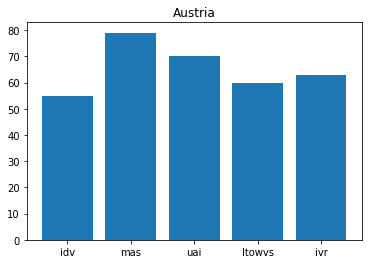

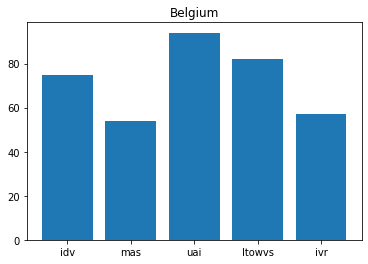

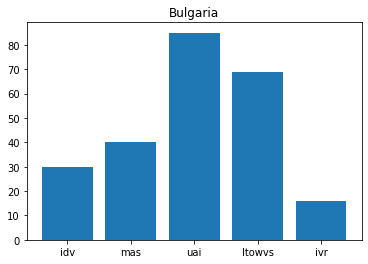

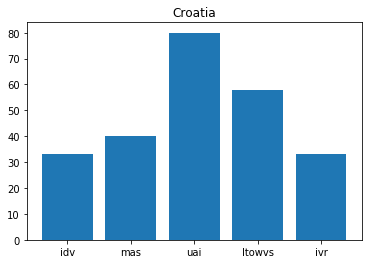

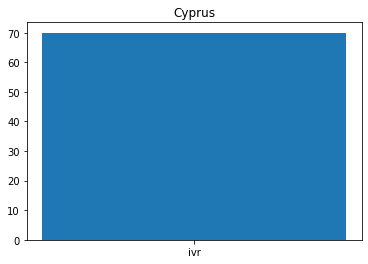

In [549]:
for country in eu_indicators['country'][:5]:
    heights = eu_indicators.loc[eu_indicators['country'] == country].iloc[:,3:].values[0]
    heights = list(heights)

    plt.bar(eu_indicators.columns[3:],height = heights)
    plt.title(country)
    plt.show()
    

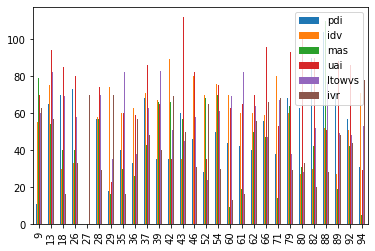

In [510]:
eu_indicators[''.plot(kind='bar')

In [545]:
eu_states_iso = list(cc.data.loc[cc.data.EU <= 2017]['ISO3'].values)

In [546]:
oecd_states_iso = list(cc.data.loc[cc.data.OECD <= 2017]['ISO3'].values)

In [547]:
set(eu_states_iso) - set(oecd_states_iso)

{'BGR', 'CYP', 'HRV', 'LTU', 'MLT', 'ROU'}

In [548]:
set(oecd_states_iso) - set(eu_states_iso)

{'AUS',
 'CAN',
 'CHE',
 'CHL',
 'ISL',
 'ISR',
 'JPN',
 'KOR',
 'MEX',
 'NOR',
 'NZL',
 'TUR',
 'USA'}

---

### OECD API


### Eurostat API

In [5]:
import eurostat


/anaconda3/envs/r_env/lib/python3.7/site-packages/pandasdmx/remote.py:11: RuntimeWarning: optional dependency requests_cache is not installed; cache options to Session() have no effect
  'to Session() have no effect', RuntimeWarning)


In [6]:
# import sys
# !{sys.executable} -m pip install eurostat

In [8]:
eurostat.get_toc_df()

,title,code,type,last update of data,last table structure change,data start,data end
0,Database by themes,data,folder,,,,
1,General and regional statistics,general,folder,,,,
2,European and national indicators for short-ter...,euroind,folder,,,,
3,Business and consumer surveys (source: DG ECFIN),ei_bcs,folder,,,,
4,Consumer surveys (source: DG ECFIN),ei_bcs_cs,folder,,,,
...,...,...,...,...,...,...,...
9923,Enterprises that provided training to develop/...,isoc_ske_ittn2,dataset,13.01.2020,27.02.2020,2012,2019
9924,Participation in education and training - cont...,sks_devcvt,folder,,,,
9925,Enterprises providing training by type of trai...,trng_cvt_01s,dataset,26.02.2019,27.02.2020,2005,2015
9926,Participants in CVT courses by sex and size cl...,trng_cvt_12s,dataset,26.02.2019,27.02.2020,2005,2015
